<a href="https://colab.research.google.com/github/give-you-favo/c_code_classify/blob/master/c_code_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone "https://github.com/FFmpeg/FFmpeg.git" "repos/ffmpeg"
!git clone "https://github.com/FFTW/fftw3.git" "repos/fftw3"
!git clone "https://github.com/sakura-editor/sakura.git" "repos/sakura"
!git clone "https://github.com/mirror/x264.git" "repos/x264"
!git clone "https://github.com/madler/zlib.git" "repos/zlib"
!git clone "https://github.com/python/cpython.git" "repos/cpython"

Cloning into 'repos/ffmpeg'...
remote: Enumerating objects: 596506, done.
remote: Total 596506 (delta 0), reused 0 (delta 0), pack-reused 596506
Receiving objects: 100% (596506/596506), 234.39 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (467073/467073), done.
Cloning into 'repos/fftw3'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23395 (delta 8), reused 14 (delta 5), pack-reused 23367
Receiving objects: 100% (23395/23395), 11.28 MiB | 6.69 MiB/s, done.
Resolving deltas: 100% (15034/15034), done.
Cloning into 'repos/sakura'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 59629 (delta 13), reused 16 (delta 8), pack-reused 59595
Receiving objects: 100% (59629/59629), 91.72 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (49828/49828), done.
Cloning into 'repos/x264'...
remote: En

In [15]:
import glob
import os
import re

import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
def c_files_path():
    target_file_name = ["*.c", "*.cpp"]
    files = []
    for filename in target_file_name:
        search_path = os.path.join("repos", "**", filename)
        files.extend(glob.glob(search_path, recursive=True))
    return files

def get_project(file):
    splitted = file.split(os.sep)
    return splitted[1]

def normalize_text(text):
    # "/* ~ */"コメントの削除
    texts = re.split('\*([^*]|\*[^/])*\*', text)
    texts = [text for text in texts if len(text)>0]
    text = "".join(texts[0::2])

    # "// ~"コメントの削除
    text = re.sub("//.*\n", "", text)

    # 改行、タブの空白スペース化
    text = text.replace("\n", " ").replace("\t", " ")

    # 特殊文字の削除(とりあえず一部だけ)
    special_chars = [";", "."]
    for spe_char in special_chars:
        text = text.replace(spe_char, " ")

    # 連続する空白スペースを1個に
    text = re.sub(r"\s+", " ", text)

    # 今日の所はこれくらいにしといてやる

    return text

def read_doc(path):
    encodings = ["utf8", "ansi", "ascii"]
    for encode in encodings:
        try:
            with open(path, encoding=encode) as f:
                doc = f.read()
                return normalize_text(doc)
        except:
            continue
    print(f"decode error in {path}")
    return "decode error"

In [16]:
# データ作成
c_files = c_files_path()
data = [[read_doc(c_file), get_project(c_file)] for c_file in c_files]
df = pd.DataFrame(data, columns=["text", "repo"])

decode error in repos/cpython/Modules/socketmodule.c
decode error in repos/cpython/Modules/_blake2/impl/blake2b-test.c
decode error in repos/cpython/Modules/_blake2/impl/blake2sp-test.c
decode error in repos/cpython/Modules/_blake2/impl/blake2bp-test.c
decode error in repos/cpython/Modules/_blake2/impl/blake2s-test.c
decode error in repos/cpython/PC/launcher.c
decode error in repos/fftw3/libbench2/verify-lib.c
decode error in repos/fftw3/libbench2/verify-r2r.c
decode error in repos/ffmpeg/doc/examples/resampling_audio.c
decode error in repos/sakura/sakura_core/_os/CDropTarget.cpp


In [19]:
# データ分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['repo'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['repo'])

train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print(train.head(30))

                                                 text    repo
0    #include <stdint h> #include "libavutil/attri...  ffmpeg
1    #include "avcodec h" #include "get_bits h" #i...  ffmpeg
2    #include "avformat h" #include "internal h" #...  ffmpeg
3    #include <errno h> #include <stdio h> #includ...  ffmpeg
4    #include "libavutil/attributes h" #include "l...  ffmpeg
5     #include "guru64 h" #include "plan-guru-r2r h"    fftw3
6    #include "aptx h" static const int32_t quanti...  ffmpeg
7   ﻿#include "StdAfx h" #include "debug/Debug3 h"...  sakura
8    #include "avcodec h" #include "get_bits h" #i...  ffmpeg
9    #include "config h" #include "libavutil/attri...  ffmpeg
10   #include "config h" #include "libavutil/attri...  ffmpeg
11   #include <stddef h> #include "config h" #if C...  ffmpeg
12   #include <inttypes h> #include "libavutil/cha...  ffmpeg
13  ﻿#include "StdAfx h" #include "_main/global h"...  sakura
14   #include "libavutil/imgutils h" #include "avc...  ffmpeg
15   #in

In [20]:
# 事例数の確認
print('【学習データ】')
print(train['repo'].value_counts())
print('【検証データ】')
print(valid['repo'].value_counts())
print('【評価データ】')
print(test['repo'].value_counts())

【学習データ】
ffmpeg     2174
sakura      312
cpython     257
fftw3       227
x264         68
zlib         36
Name: repo, dtype: int64
【検証データ】
ffmpeg     272
sakura      39
cpython     32
fftw3       28
x264         8
zlib         5
Name: repo, dtype: int64
【評価データ】
ffmpeg     272
sakura      39
cpython     32
fftw3       29
x264         9
zlib         4
Name: repo, dtype: int64


In [21]:
!pip install transformers

     |████████████████████████████████| 675kB 2.6MB/s 
     |████████████████████████████████| 1.1MB 12.9MB/s 
     |████████████████████████████████| 3.8MB 14.2MB/s 
     |████████████████████████████████| 890kB 27.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=574e266811efe65346251d25578f31811cc00bd8d7f82ae8f993a26a146093e2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [22]:
import numpy as np
import transformers
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch import optim
from torch import cuda
import time
from matplotlib import pyplot as plt

In [23]:
# Datasetの定義
class CreateDataset(Dataset):
  def __init__(self, X, y, tokenizer, max_len):
    self.X = X
    self.y = y
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):  # len(Dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, index):  # Dataset[index]で返す値を指定
    text = self.X[index]
    inputs = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      pad_to_max_length=True
    )
    ids = inputs['input_ids']
    mask = inputs['attention_mask']

    return {
      'ids': torch.LongTensor(ids),
      'mask': torch.LongTensor(mask),
      'labels': torch.Tensor(self.y[index])
    }

In [24]:
# 正解ラベルのone-hot化
y_train = pd.get_dummies(train, columns=['repo'])[['repo_ffmpeg','repo_fftw3','repo_sakura','repo_x264','repo_zlib','repo_cpython']].values
y_valid = pd.get_dummies(valid, columns=['repo'])[['repo_ffmpeg','repo_fftw3','repo_sakura','repo_x264','repo_zlib','repo_cpython']].values
y_test = pd.get_dummies(test, columns=['repo'])[['repo_ffmpeg','repo_fftw3','repo_sakura','repo_x264','repo_zlib','repo_cpython']].values

# Datasetの作成
max_len = 20
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset_train = CreateDataset(train['text'], y_train, tokenizer, max_len)
dataset_valid = CreateDataset(valid['text'], y_valid, tokenizer, max_len)
dataset_test = CreateDataset(test['text'], y_test, tokenizer, max_len)

for var in dataset_train[0]:
  print(f'{var}: {dataset_train[0][var]}')


ids: tensor([  101,  1001,  2421,  1026,  2358,  8718,  2102,  1044,  1028,  1001,
         2421,  1000,  5622,  3676, 19722,  3775,  2140,  1013, 12332,   102])
mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
labels: tensor([1., 0., 0., 0., 0., 0.])


In [25]:
# BERT分類モデルの定義
class BERTClass(torch.nn.Module):
  def __init__(self, drop_rate, otuput_size):
    super().__init__()
    self.bert = BertModel.from_pretrained('bert-base-uncased')
    self.drop = torch.nn.Dropout(drop_rate)
    self.fc = torch.nn.Linear(768, otuput_size)  # BERTの出力に合わせて768次元を指定

  def forward(self, ids, mask):
    _, out = self.bert(ids, attention_mask=mask)
    out = self.fc(self.drop(out))
    return out

In [26]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
  """ 損失・正解率を計算"""
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for data in loader:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 順伝播
      outputs = model.forward(ids, mask)

      # 損失計算
      loss += criterion(outputs, labels).item()

      # 正解率計算
      pred = torch.argmax(outputs, dim=-1).cpu().numpy() # バッチサイズの長さの予測ラベル配列
      labels = torch.argmax(labels, dim=-1).cpu().numpy()  # バッチサイズの長さの正解ラベル配列
      total += len(labels)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  """モデルの学習を実行し、損失・正解率のログを返す"""
  # デバイスの指定
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for data in dataloader_train:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model.forward(ids, mask)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [27]:
# パラメータの設定
DROP_RATE = 0.4
OUTPUT_SIZE = 6
BATCH_SIZE = 32
NUM_EPOCHS = 4
LEARNING_RATE = 2e-5

# モデルの定義
model = BERTClass(DROP_RATE, OUTPUT_SIZE)

# 損失関数の定義
criterion = torch.nn.BCEWithLogitsLoss()

# オプティマイザの定義
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = 'cuda' if cuda.is_available() else 'cpu'

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, device=device)


epoch: 1, loss_train: 0.1657, accuracy_train: 0.9118, loss_valid: 0.1698, accuracy_valid: 0.8984, 2516.6015sec
epoch: 2, loss_train: 0.0862, accuracy_train: 0.9606, loss_valid: 0.0931, accuracy_valid: 0.9505, 2018.3128sec
epoch: 3, loss_train: 0.0564, accuracy_train: 0.9697, loss_valid: 0.0644, accuracy_valid: 0.9557, 2029.2894sec
epoch: 4, loss_train: 0.0424, accuracy_train: 0.9782, loss_valid: 0.0552, accuracy_valid: 0.9714, 2030.1237sec


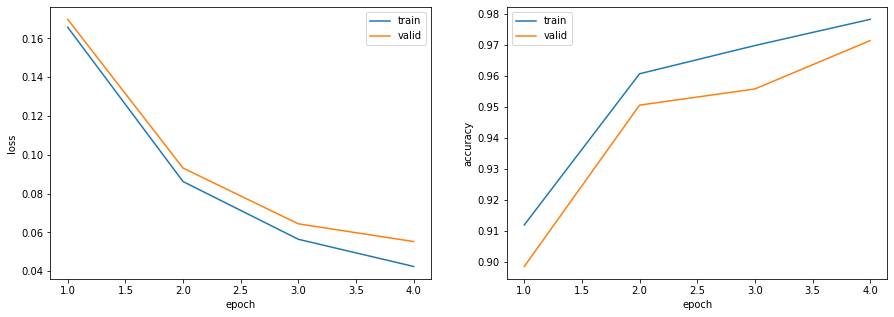

In [28]:
# ログの可視化
x_axis = [x for x in range(1, len(log['train']) + 1)]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x_axis, np.array(log['train']).T[0], label='train')
ax[0].plot(x_axis, np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(x_axis, np.array(log['train']).T[1], label='train')
ax[1].plot(x_axis, np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [29]:
# 正解率の算出
def calculate_accuracy(model, dataset, device):
  # Dataloaderの作成
  loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for data in loader:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 順伝播 + 予測値の取得 + 正解数のカウント
      outputs = model.forward(ids, mask)
      pred = torch.argmax(outputs, dim=-1).cpu().numpy()
      labels = torch.argmax(labels, dim=-1).cpu().numpy()
      total += len(labels)
      correct += (pred == labels).sum().item()

  return correct / total

print(f'正解率（学習データ）：{calculate_accuracy(model, dataset_train, device):.3f}')
print(f'正解率（検証データ）：{calculate_accuracy(model, dataset_valid, device):.3f}')
print(f'正解率（評価データ）：{calculate_accuracy(model, dataset_test, device):.3f}')

正解率（学習データ）：0.978
正解率（検証データ）：0.971
正解率（評価データ）：0.969


参考
https://qiita.com/yamaru/items/63a342c844cff056a549